<a href="https://colab.research.google.com/github/S-loaiza-UAO/Deep-Learning/blob/main/Santiago_loaiza_Laboratorio3_2024_CVwDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'> **LABORATORY 3. Instance Segmentation on a Custom Dataset**
##Computational Vision with Deep Learning

<font color='red'>Integrantes : **1 persona**

<font color='red'>Nombres y Apellidos: **Santiago Loaiza Cardona**

<font color='red'>Codigo UAO: **2238094**

####NOTE: The following Notebook is based on one provided by the [ROBOFLOW](https://github.com/roboflow/notebooks) and is free to use.

####**This was modified and adjusted for the implementation of an own model.**


#Train YOLOv8 Instance Segmentation on a Custom Dataset


---



##Introduction to YOLO: What is YOLO?
[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.


In [1]:
# Verificar conexion con la GPU
!nvidia-smi

Sat May  4 22:11:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Direccion de inicio para descarga del dataset
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ Follow the next command, if you experience errors that prevent you from going through the tutorial -open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

We will instal YOLOv8 via Pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Metodo de instalacion Pip (recomendado)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


In [4]:
# Importar librerias
from ultralytics import YOLO
from IPython.display import display, Image

## CLI Basics (Command Line Interface Usage)

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

# Preparing a custom dataset




---

## How to prepare?
Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src=""
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 4: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




## What we obtain?

Firt of all, what kind of dataset we are using?

We call **Safety work support Image Dataset** and is focus in support the safety work into the industrial plants during operation. In our case is very important reduce the risk into the factory, so this is an important advance to improve and future implement.

153 images, divide in 88% train set / 8% valid set / 4% test set

We train de model to inference in 3 classes:
* Person
* Hhelmet
* Ear-caps

Check the model here!
[Safety work support Project](https://universe.roboflow.com/laboratorio-3/safety-work-support-fqzen)

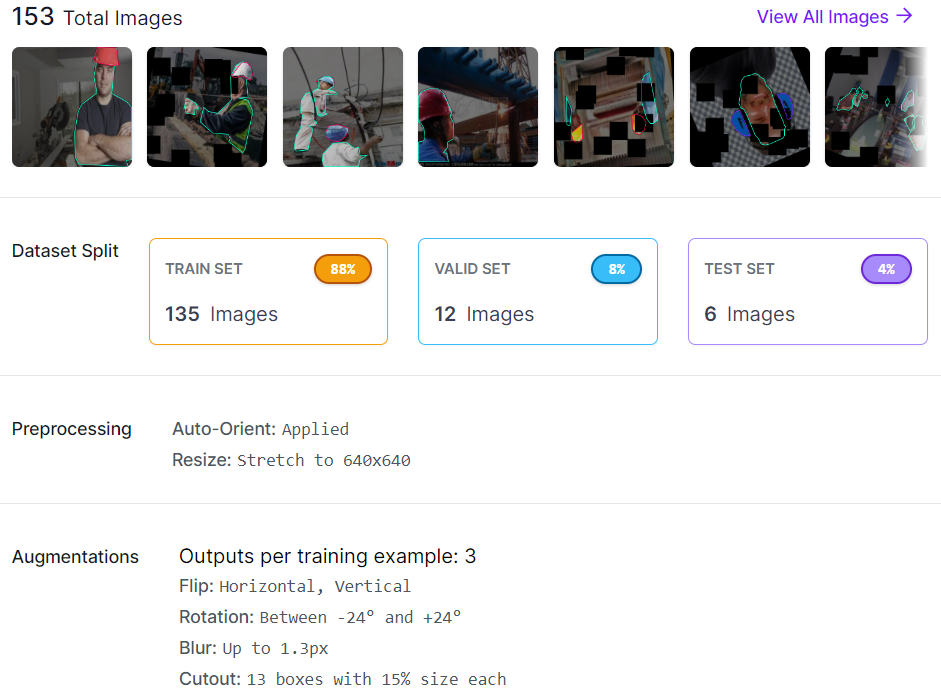

# Custom Training

In [5]:
# Instalamos roboflow
%cd {HOME}

!pip install roboflow

# A continuacion importamos el modelo previamente cargado desde Roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="eGLc5oQVOGyzoLjfLEpd")
project = rf.workspace("laboratorio-3").project("safety-work-support-fqzen")
version = project.version(1)
dataset = version.download("yolov5")

/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled c

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Safety-work-support-1 in yolov5pytorch:: 100%|██████████| 318/318 [00:00<00:00, 7280.19it/s]


In [7]:
# Comando para entrenamiento del modelo
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

/content
New https://pypi.org/project/ultralytics/8.2.8 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/Safety-work-support-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualiz

In [9]:
# Que obtuvimos despues del entrenamiento?
!ls {HOME}/runs/segment/train2/

args.yaml					    labels_correlogram.jpg  train_batch0.jpg
BoxF1_curve.png					    labels.jpg		    train_batch1.jpg
BoxP_curve.png					    MaskF1_curve.png	    train_batch2.jpg
BoxPR_curve.png					    MaskP_curve.png	    val_batch0_labels.jpg
BoxR_curve.png					    MaskPR_curve.png	    val_batch0_pred.jpg
confusion_matrix_normalized.png			    MaskR_curve.png	    weights
confusion_matrix.png				    results.csv
events.out.tfevents.1714860925.2b48c8064740.1464.0  results.png


/content


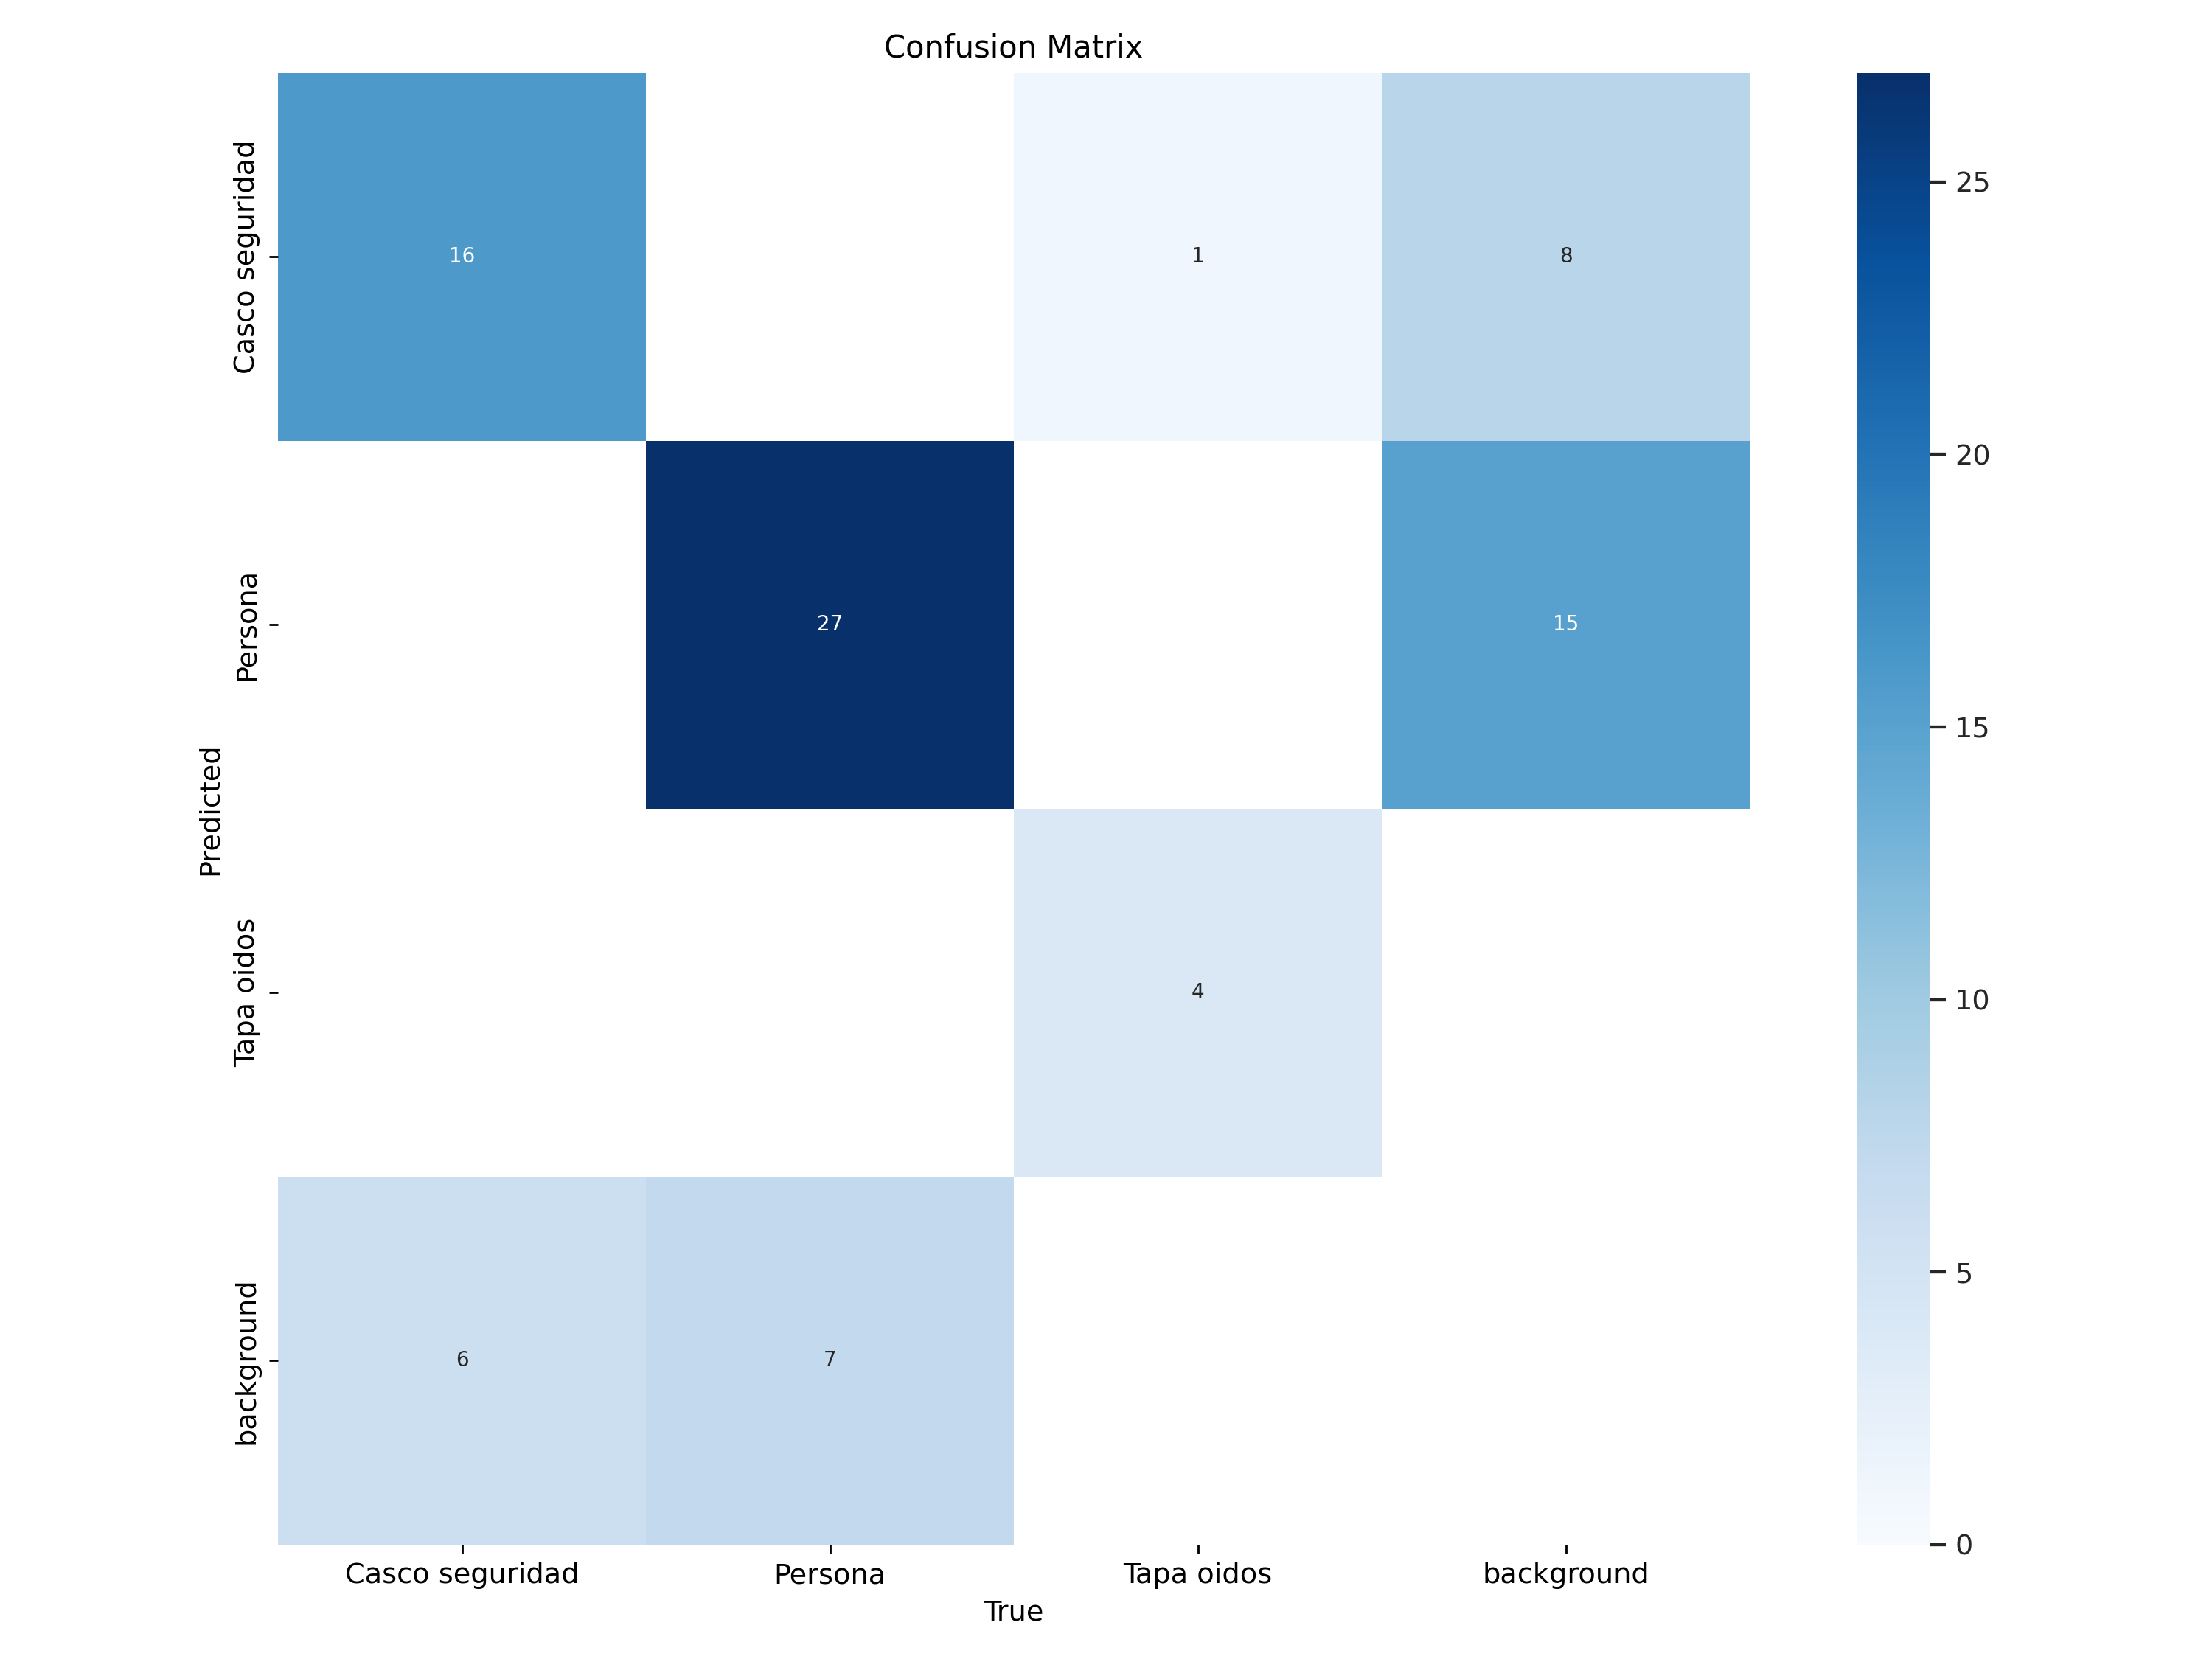

In [10]:
# Observamos la matriz de confusion
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/confusion_matrix.png', width=600)

/content


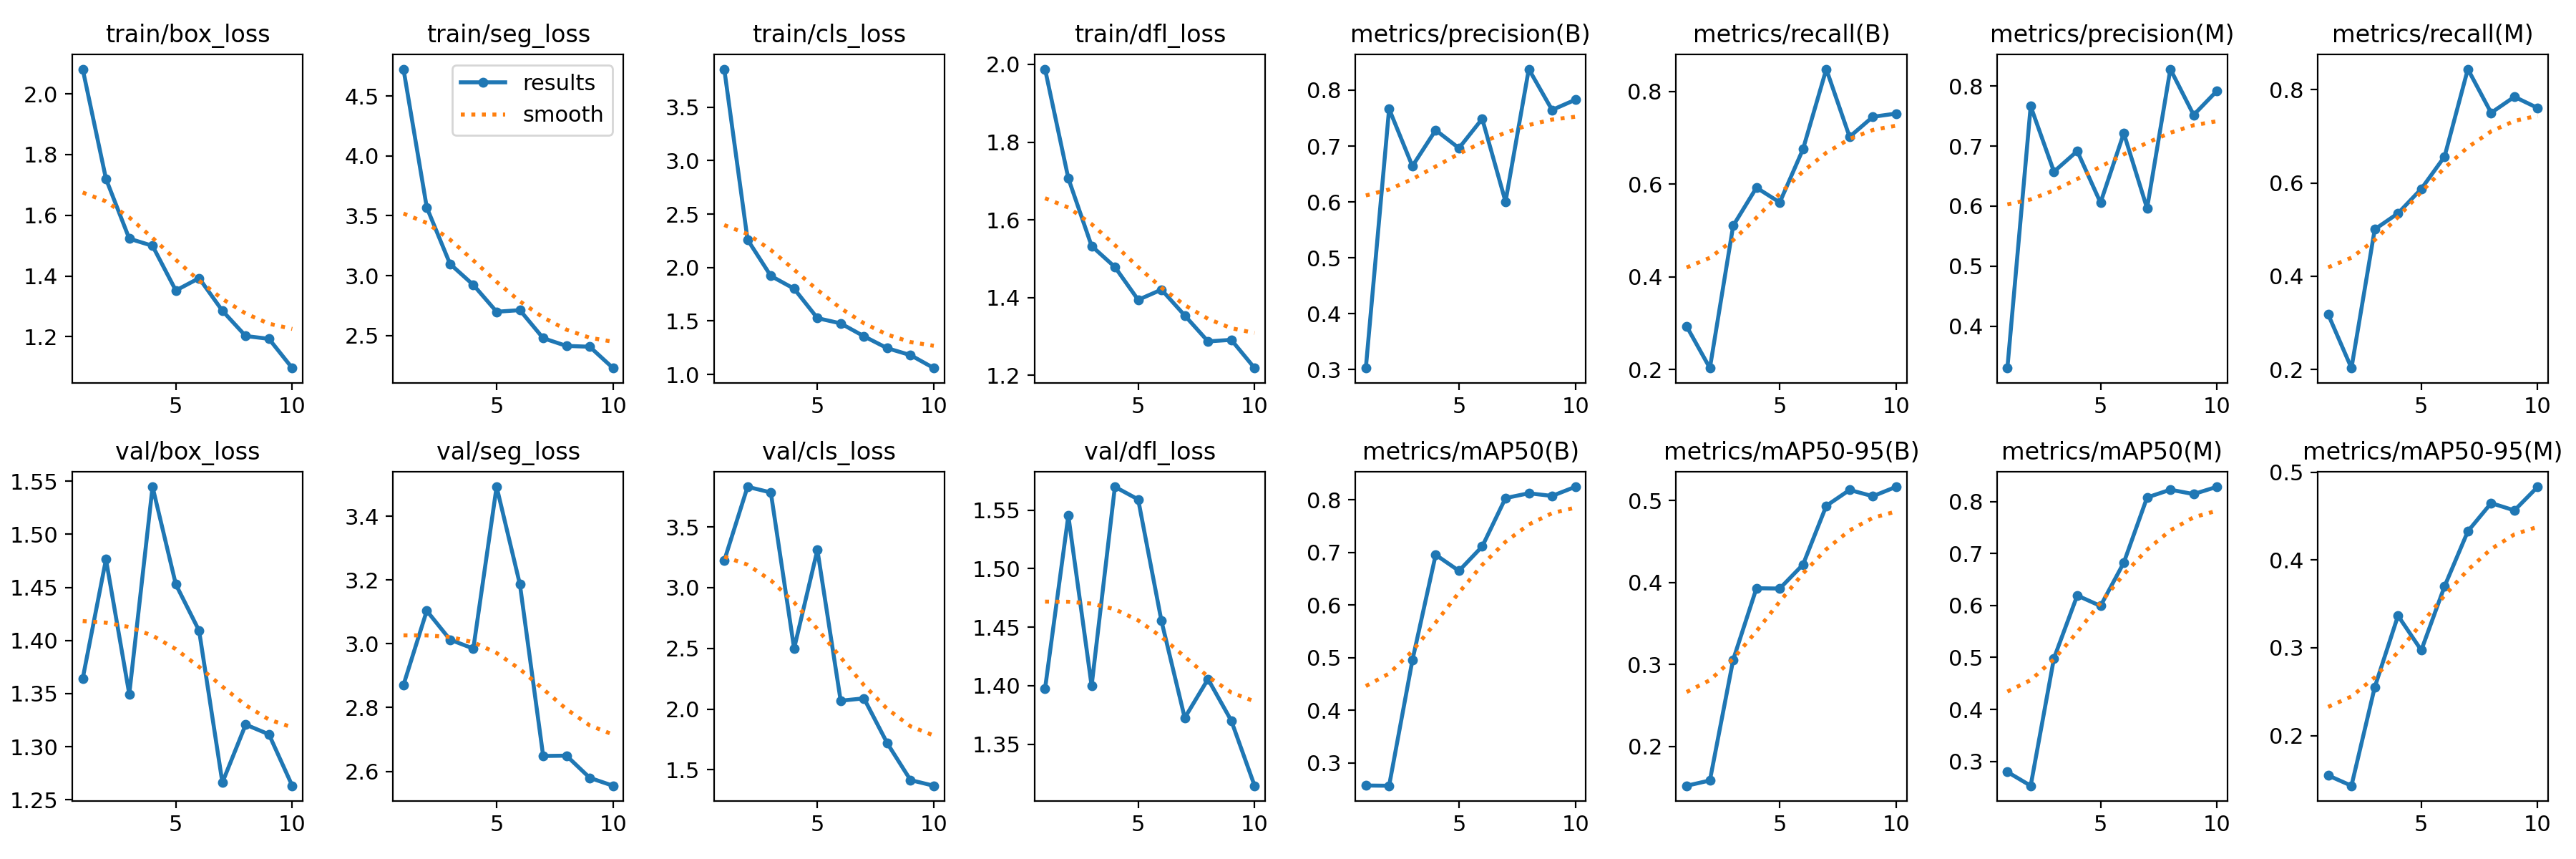

In [11]:
# Observamos los resultados obtenidos en el entrenamiento desde COLAB
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/results.png', width=600)

Next see the results obtain from roboflow platform training:
of this result we can conclud is a good accuracy for an small dataset.

the model learn during advance the epochs

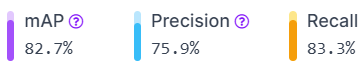

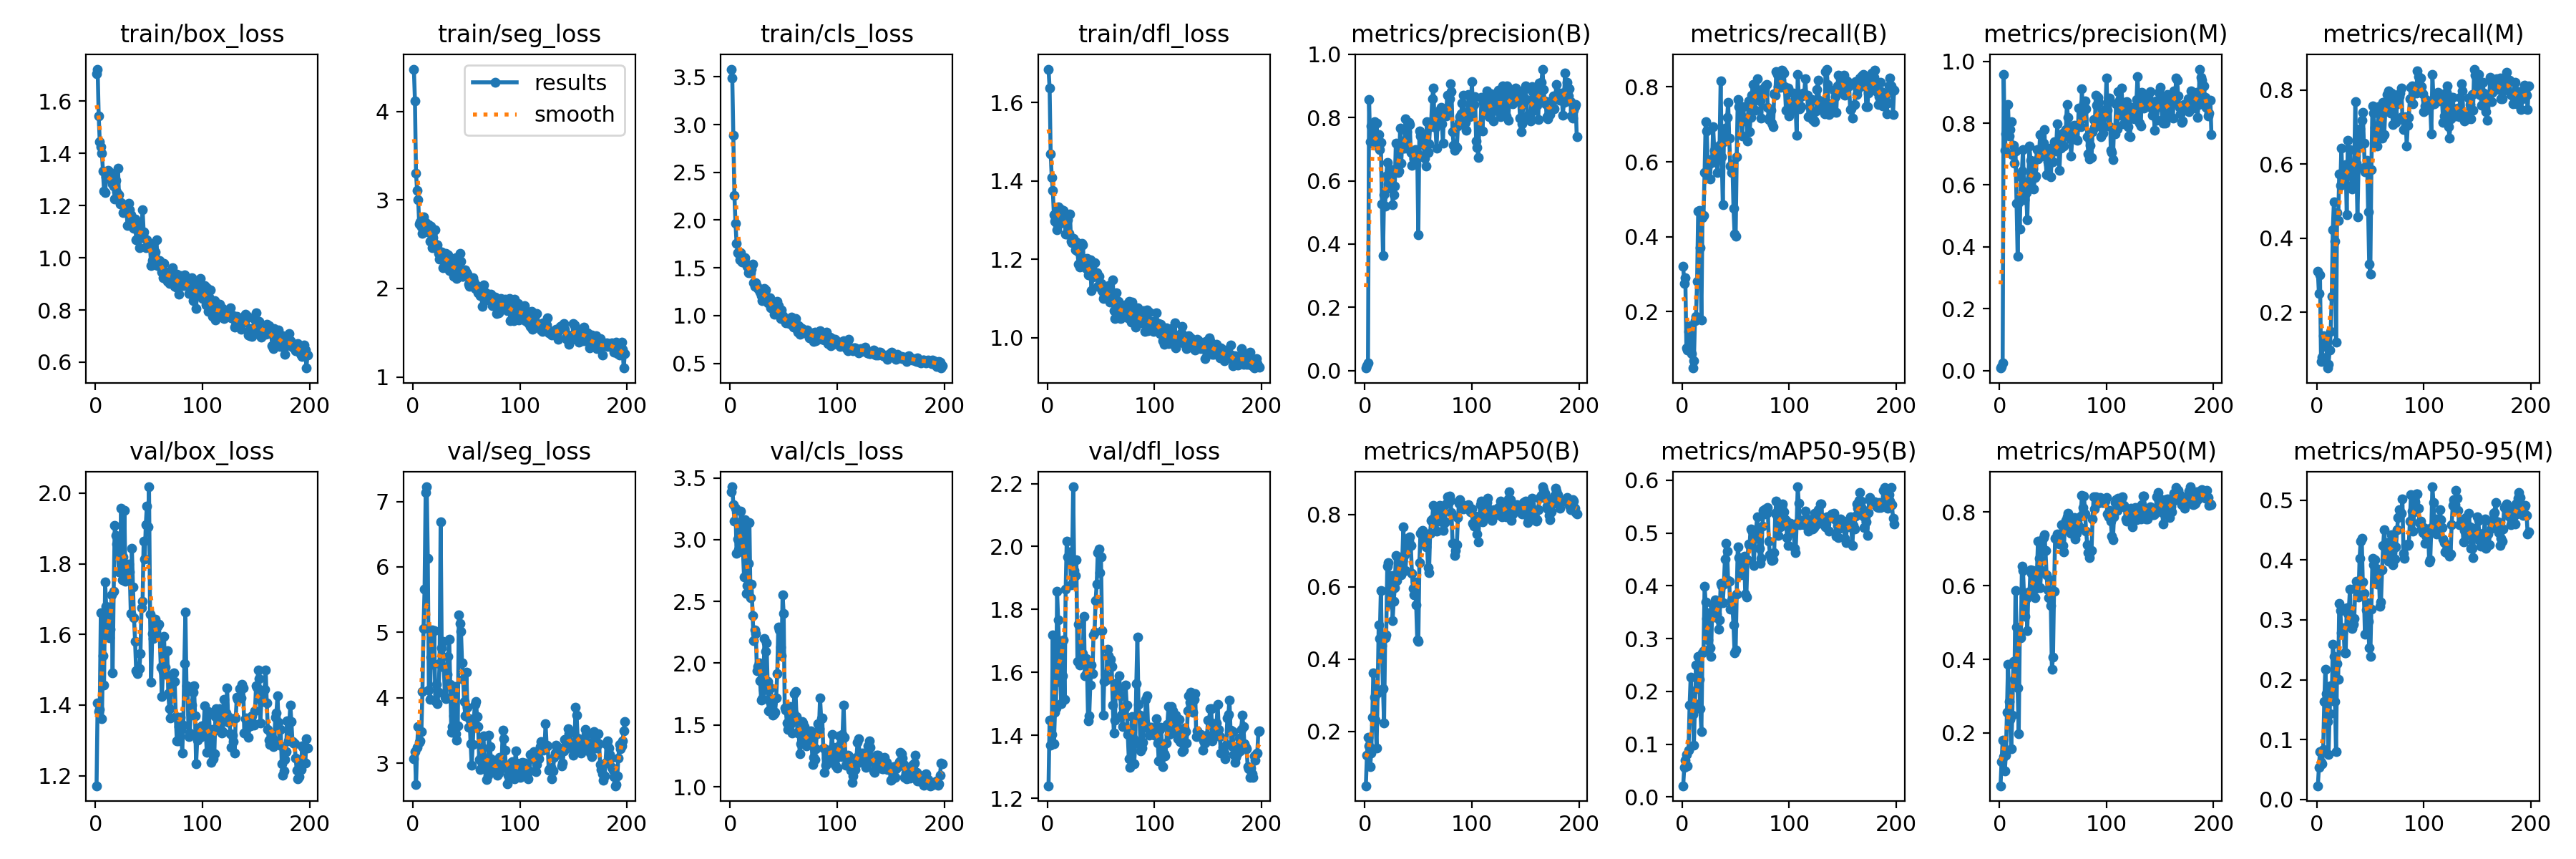

/content


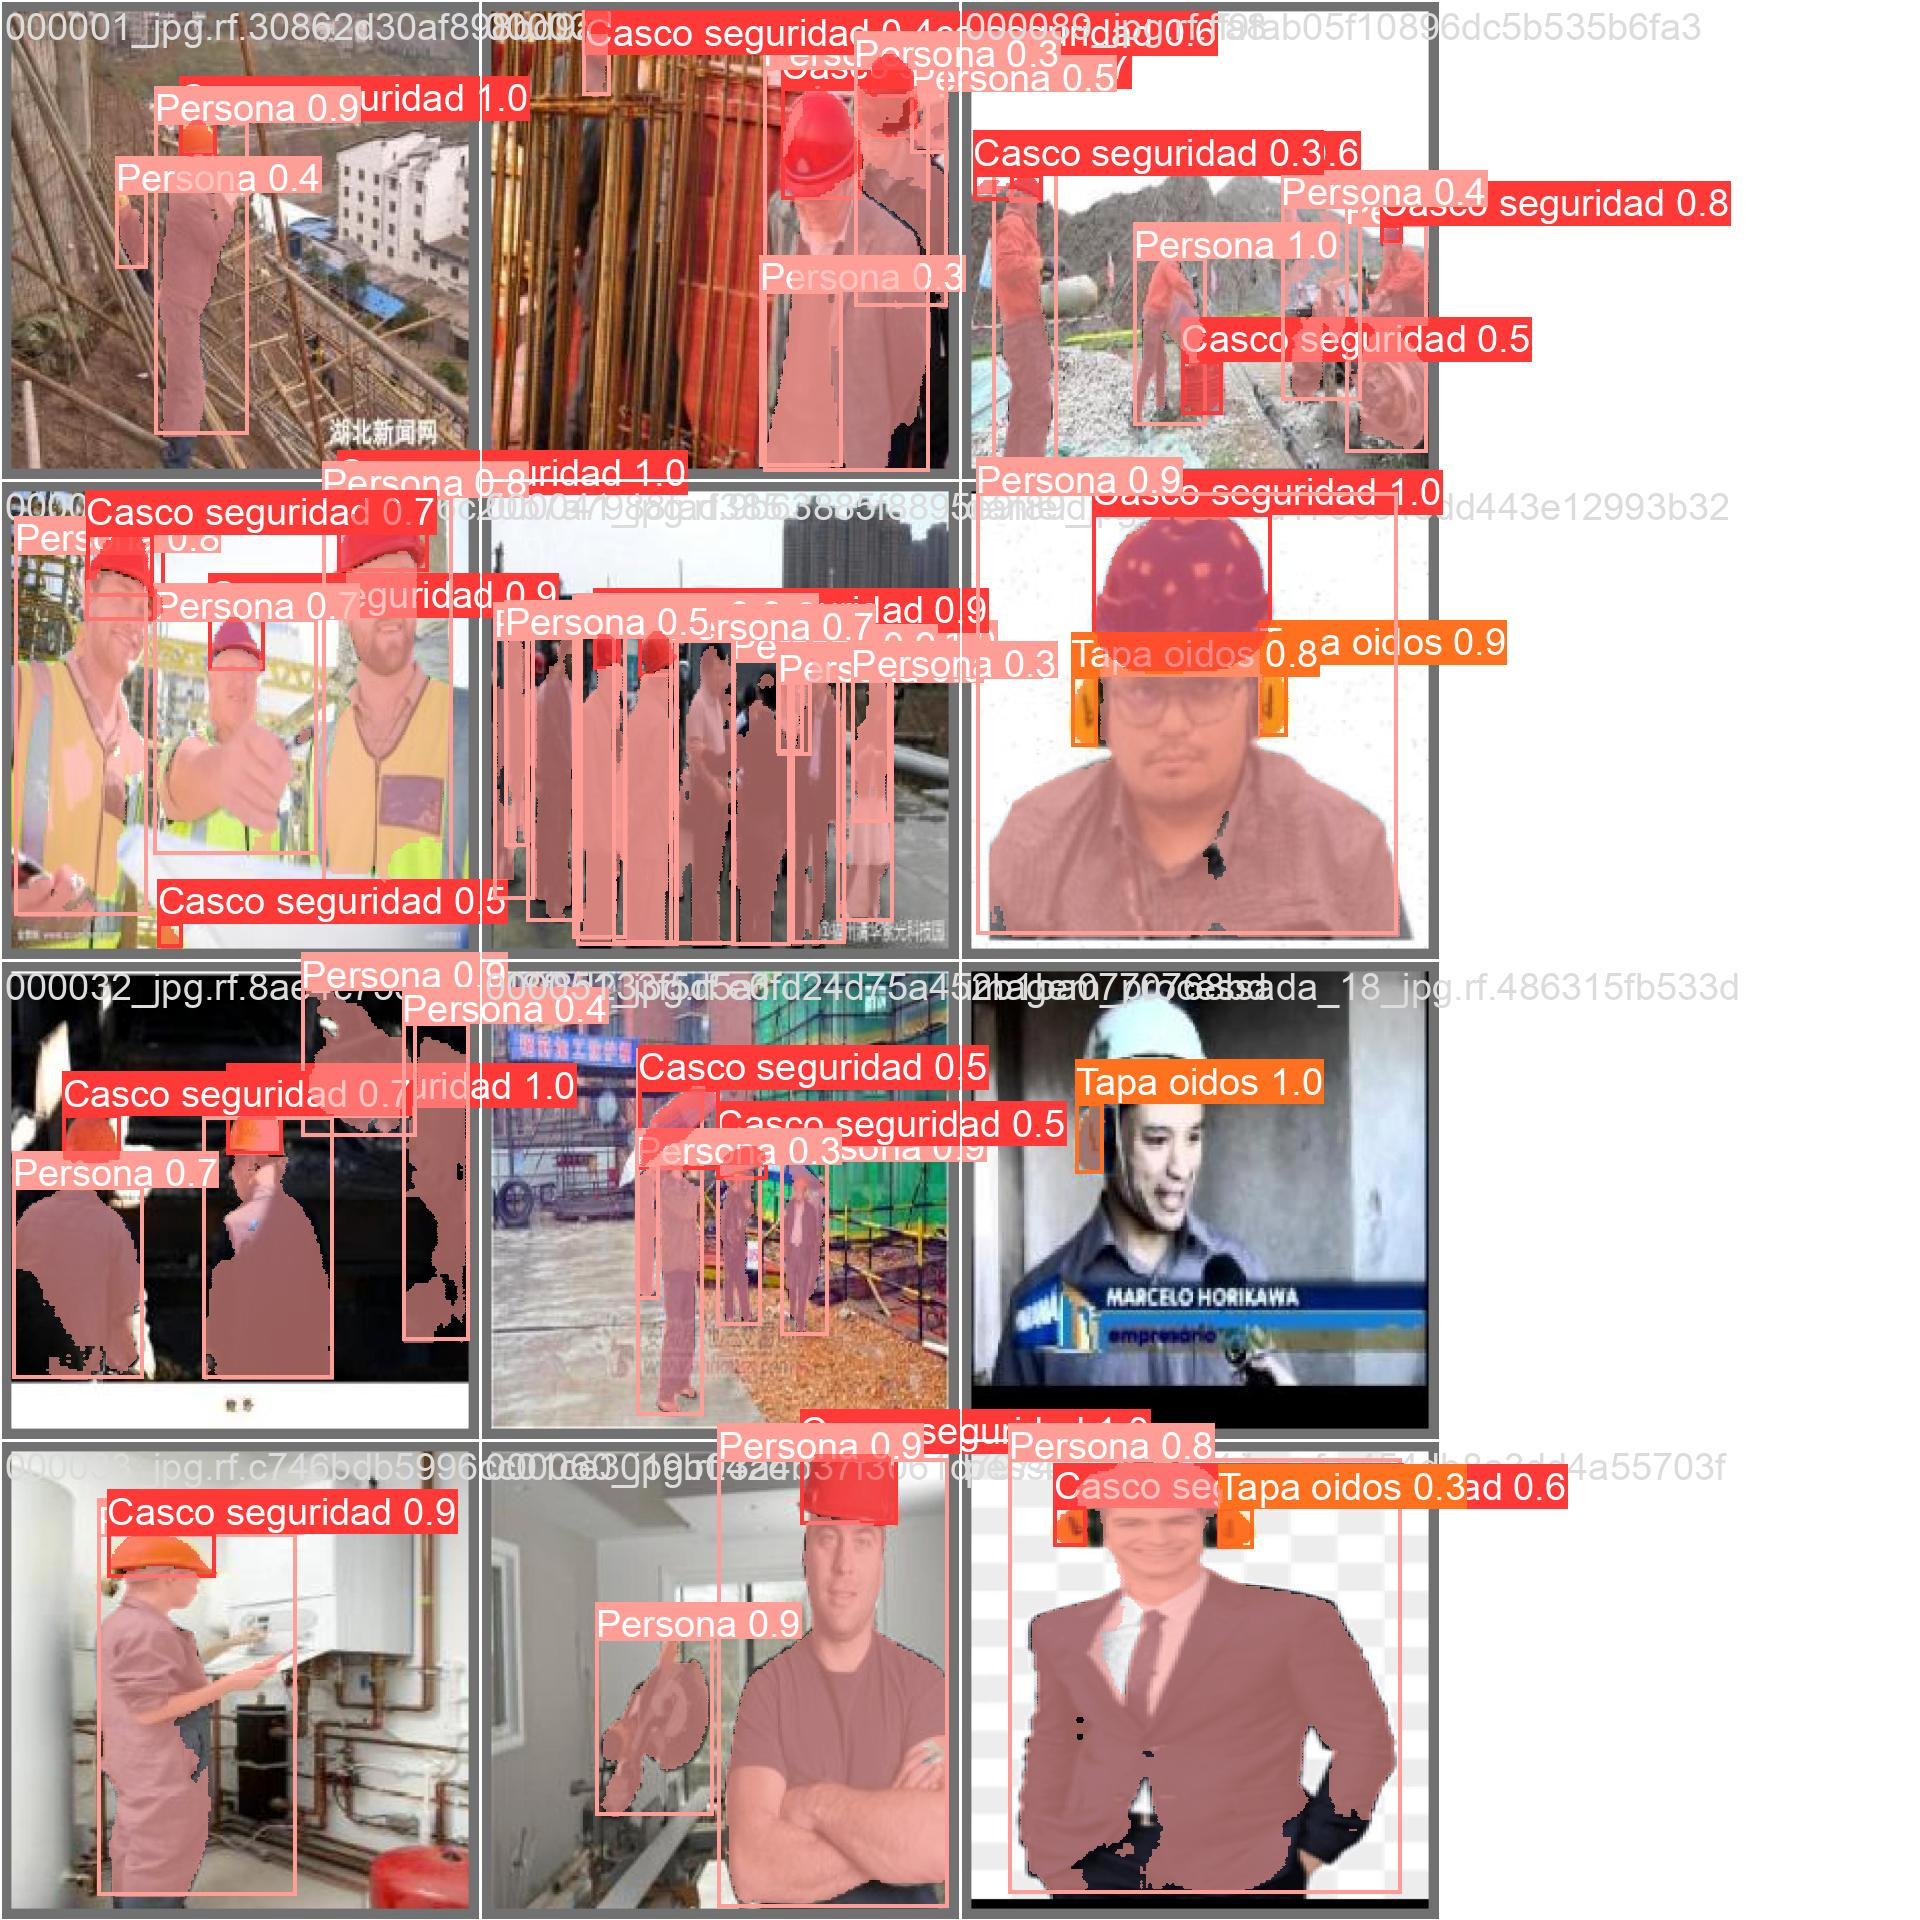

In [12]:
#Observamos una imagen de test para el modelo
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [13]:
#Ejecutamos la validacion del modelo con los pesos y sesgos ajustados
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/Safety-work-support-1/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100% 12/12 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.13s/it]
                   all         12         61      0.783      0.751      0.825      0.514      0.792       0.76      0.828      0.484
       Casco seguridad         12         22      0.654      0.727      0.788      0.607      0.654      0.727       0.79      0.603
               Per

## Inference with Custom Model

In [14]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs

image 1/6 /content/Safety-work-support-1/test/images/000013_jpg.rf.4c509bf35856649a12cfa18347da5a0c.jpg: 640x640 1 Casco seguridad, 1 Persona, 20.9ms
image 2/6 /content/Safety-work-support-1/test/images/000031_jpg.rf.01725a62abe03bb55e39d5fb4ed11aab.jpg: 640x640 (no detections), 20.9ms
image 3/6 /content/Safety-work-support-1/test/images/000049_jpg.rf.52d6481ae67577d5b239e0822745aa4a.jpg: 640x640 2 Casco seguridads, 1 Persona, 20.9ms
image 4/6 /content/Safety-work-support-1/test/images/000074_jpg.rf.98f68c643c4f3f25d4021586a56bd1ea.jpg: 640x640 1 Casco seguridad, 2 Personas, 20.8ms
image 5/6 /content/Safety-work-support-1/test/images/000092_jpg.rf.0aa97798295e8db8e22eb0cb90a839bf.jpg: 640x640 1 Casco seguridad, 2 Personas, 20.8ms
image 6/6 /content/Safety-work-support-1/test/images/pessoa-6-_png_jpg.rf.1

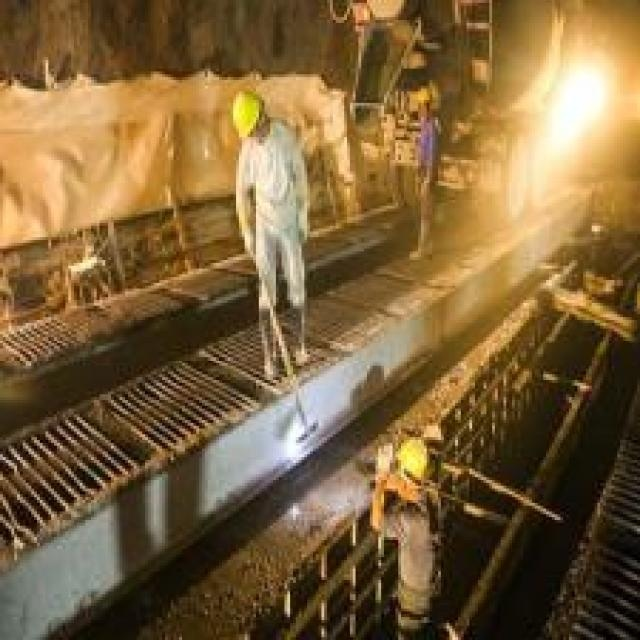

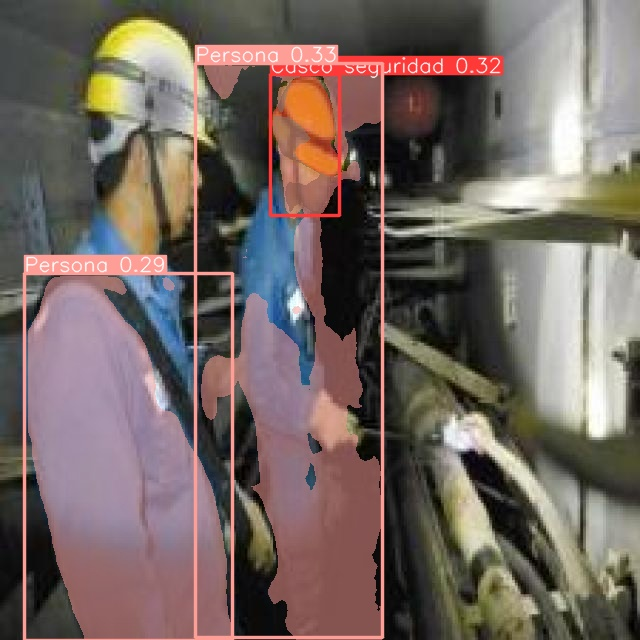

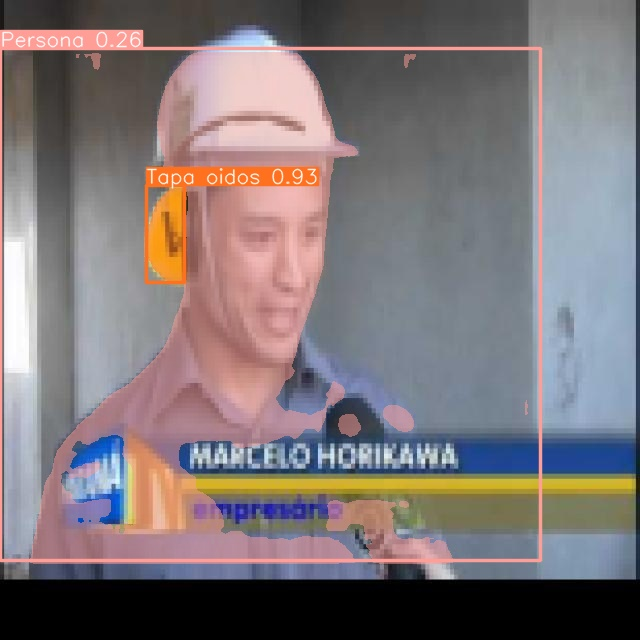

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

## Save & Deploy model

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload and your model weights to Roboflow Deploy for autolabeling, autoscaling inference, and using later.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) supports uploading YOLOv8 weights.

Run this cell to save your model weights:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"{HOME}/runs/segment/train/")

#Conclusions

Next see an example of the inference the model in a image. this image is part of the dataset, so the probability of a good inference is very high.

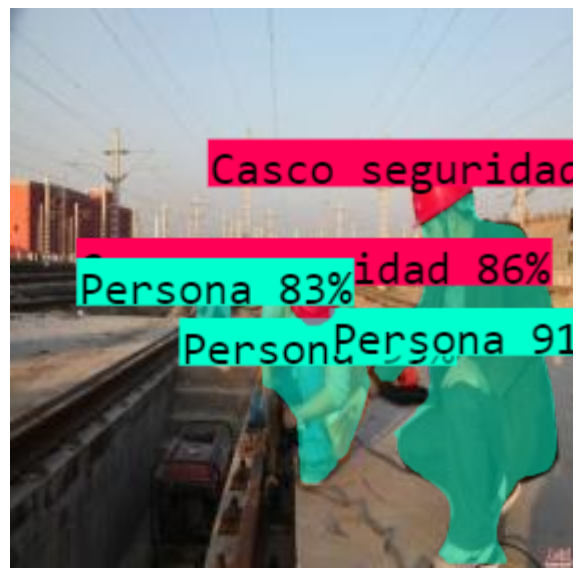

But what happend if we check with another images that model never see?

the next 3 images the model never see, we can concluid the model isn´t very accurate, but maybe they have a explanation.

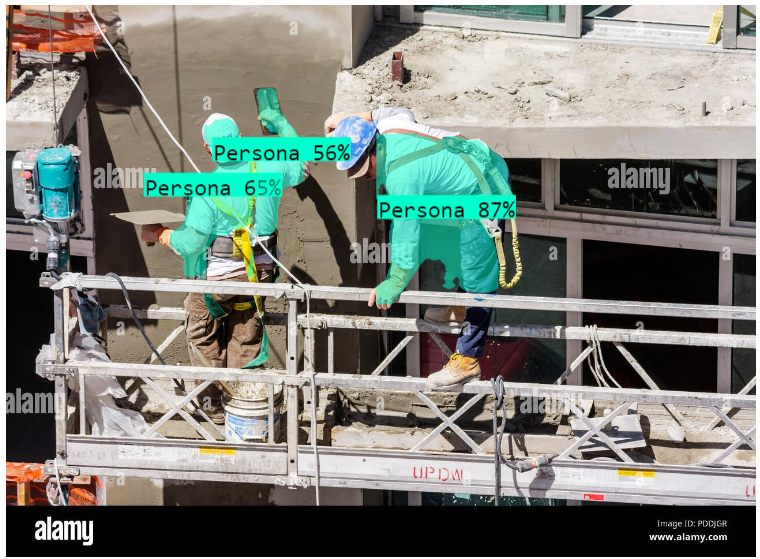

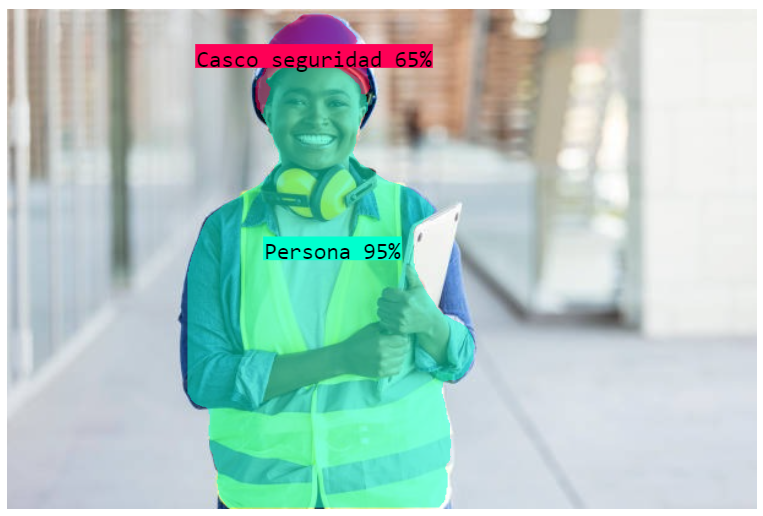

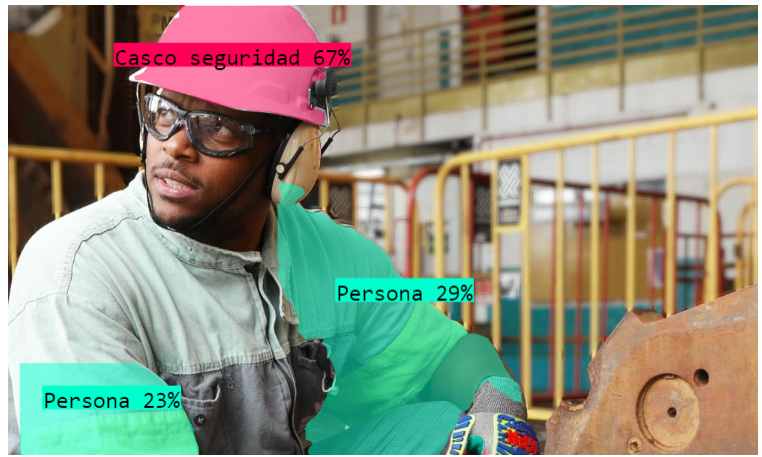

When check the class balance for the dataset, is clear why the model is acurate for class: person, and why cost to much for model inference for class: ear-caps

classes are unbalanced. principal for ear-caps

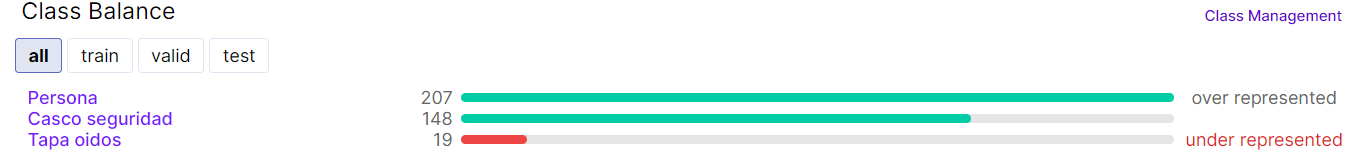

----- END------